<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
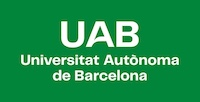
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104346 - Processament de Senyal, Imatge i Vídeo</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    Nom, cognoms i NIU: David Morillo Massagué (1666540)
</div>

David Morillo Massagué (1666540)

# **Laboratori 4-1**: Anàlisi de la concentració de diòxid de carboni (_TSA_)

En aquest primer cas, analitzarem com evoluciona la concentració de CO\textsuperscript{2} a diferents països, des d'un punt de vista de l'anàlisi de sèries temporals (_Time Series Analysis_, TSA). És a dir, en aquest exemple intentarem entendre el comportament d'una sèrie temporal i els patrons subjacents, però el nostre objectiu no serà crear un model predictiu que ens permeti predir els comportaments futurs. 

Les dades emprades en aquests activitat han estat extretes del _National Oceanic & Atmospheric Administration_ de l'_U.S. Department of Commerce_ (Dr. Pieter Tans, [NOAA/ESRL](http://www.esrl.noaa.gov/gmd/ccgg/trends/) i Dr Ralph Keeling, [Scripps Institution of Oceanography](http://scrippsco2.ucsd.edu)), i us les proporcionem adjuntes a aquest _notebook_ en el fitxer:
- `datasets/Monthly_CO2_Concentrations.xls`

<u>Format de l'entrega</u>:
- Cal entregar el _notebook_ **executat, sense errors i amb els resultats** de totes les cel·les (en format `.ipynb`).
- Addicionalment, també cal entregar l'exportació del _notebook_ executat en format **HTML** (`File` -> `Save and export notebook as...` -> `HTML`).

Les llibreries necessàries per resoldre aquesta activitat són:

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

# set warnings off
import warnings
warnings.filterwarnings('ignore')

from typing import Tuple
import statsmodels.api as sm

Però es deixa **llibertat per utilitzar qualsevol altre llibreria**, sempre ques justifiqui la seva necessitat per resoldre l'activitat.

## 1. Exercici 1: Càrrega de les dades (_1 punt_)

En el primer exercici, es demana:
1. Carregar el fitxer amb les dades (`Monthly_CO2_Concentrations.xls`) en una variable de `Numpy` o `Pandas`, revisant (i corregint, si cal) la presència de valors nuls o errònis en les dades.
2. Descripció del conjunt de dades, on s'indiqui (com a mínim) el tamany del _dataset_, tipus de dades i rang de les dades. 
3. Anàlisi descriptiu bàsic de la dades, on s'indiqui (com a mínim) el valor mig i la desviació estàndar per cadascun dels anys. Es poden utilitzar gràfics tipus _boxplot_ per mostrar aquesta informació.

In [10]:
# Necessari per pd.read_excel() en cas de no estar instalat
!pip install openpyxl

In [11]:
file_path = 'datasets/Monthly_CO2_Concentrations.xlsx'

df = pd.read_excel(file_path)
df.dropna(inplace=True) # Eliminar files en blanc

df['Year'] = df['Year'].astype(int) # Converir valors float de anys a INT
df['Month'] = df['Month'].astype(int) # Converir valors float de mesos a INT
#df['CO2'] = df['CO2'].astype(float)
# Els valors de CO2 ja estan a FLOAT

df.sort_values(by=['Year', 'Month']) # Ens assegurem d'ordenar els valors segons la data

print(f"{len(df)} registres importats\n") # Printem el número de registres del dataset net

def rank(name: str, data: list) -> None:
    print(f"{name} rank:")
    print(f"Min: {min(data)}")
    print(f"Max: {max(data)}\n")

mean = df["CO2"].mean()
std_dev = df["CO2"].std()

print(f"Mitjana CO2: {mean}\n")
print(f"Desviació típica CO2: {std_dev}\n")

evaluate = ["CO2", "Year", "Month"]

[rank(i, df[i]) for i in evaluate] # Obtenim el rang de cada columna

print(df.head()) # Dóna una idea del format i dades del dataframe

print(f"\nTipus de dades de La columna CO2: {df["CO2"].dtype}")
print(f"Tipus de dades de La columna Year: {df["Year"].dtype}")
print(f"Tipus de dades de La columna Month: {df["Month"].dtype}")

161 registres importats

Mitjana CO2: 339.13254658385097

Desviació típica CO2: 6.047047345554593

CO2 rank:
Min: 327.29
Max: 351.71

Year rank:
Min: 1974
Max: 1987

Month rank:
Min: 1
Max: 12

      CO2  Year  Month
0  333.13  1974      5
1  332.09  1974      6
2  331.10  1974      7
3  329.14  1974      8
4  327.36  1974      9

Tipus de dades de La columna CO2: float64
Tipus de dades de La columna Year: int32
Tipus de dades de La columna Month: int32


Podem comprovar que s'importen un total de 161 regisres de CO2 vàlids.

Veiem que els valors de CO2 fluctuen entre els [327.29, 351.71], el anys entre [1974, 1987] i els mesos entre [1, 12].

La mitjana dels valors de CO2 és de 339.13254658385097 ppm i la desviació típica és de 6.047047345554593 ppm

Els valors de CO2 estàn guardats en variables de tipus float64, mentre que pels anys i mesos ho fem amb int32 per ambdos.

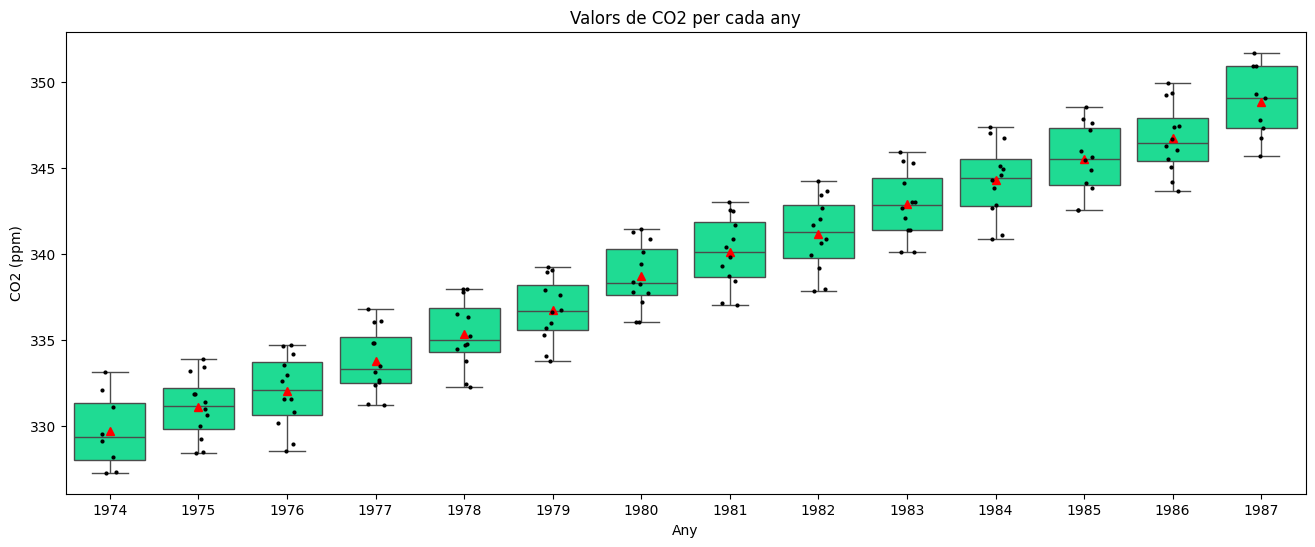

In [12]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Year', y='CO2', color="mediumspringgreen", showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"red"})
sns.stripplot(data=df, x='Year', y='CO2', color='black', size=3, jitter=True)
plt.title('Valors de CO2 per cada any')
plt.xlabel('Any')
plt.ylabel('CO2 (ppm)')
plt.show()

Aquí es mostra la visualització de les dades de cada any en forma de boxplot. Decidim mostrar també, per cada registre, (12 per cada boxplot) un punt negre que indica el valor de CO2 en aquell any.

Podem veure clarament com existex un creixement quasi linear del CO2, si observem el valor de la mitja (marcada en vermell) cada any.

També es pot observar una distribució uniforme dels valors al llarg de cada any, sense presència de valors extrems. Aquesta característica es fa evident en analitzar la distribució dels quartils, així com els valors màxims i mínims en el gràfic.

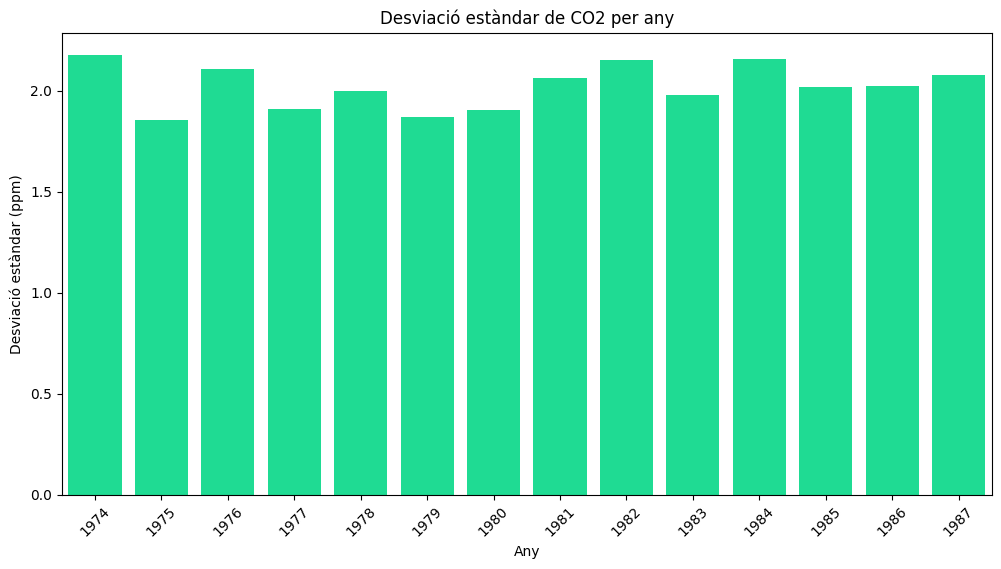

In [13]:
std_by_year = df.groupby('Year')['CO2'].std()

plt.figure(figsize=(12, 6))
sns.barplot(x=std_by_year.index, y=std_by_year.values, color='mediumspringgreen')
plt.title('Desviació estàndar de CO2 per any')
plt.xlabel('Any')
plt.ylabel('Desviació estàndar (ppm)')
plt.xticks(rotation=45)
plt.show()

Observem que els valors de la desviació estàndard per cada any són molt similars, amb poques diferències apreciables.

## Exercici 2. Descomposició de la sèrie temporal (_6 punts_)

Tal com hem vist en la teoria associada, una sèrie temporal es pot descomposar en les següents components:

$x_t = f_t + s_t + c_t + e_t$

on:
- $f_t$ representa la tendència,
- $s_t$ representa l'estacionalitat, 
- $c_t$ representa les variacions cícliques, 
- $e_t$ representa les variacions aleatòries o irregulars.

En aquest exercici es demana:
1. Extreu la component de **la tendència** de la sèrie temporal. Mostra (visualitza) aquesta component i indica les principals característiques.
2. Extreu la component de **l'estacionalitat** de la sèrie temporal. Mostra (visualitza) aquesta component i indica les principals característiques.
1. Extreu la component de **les variacions cícliques** de la sèrie temporal. Mostra (visualitza) aquesta component i indica les principals característiques.
1. Extreu la component de **les variacions aleatòries o irregulars** de la sèrie temporal. Mostra (visualitza) aquesta component i indica les principals característiques.

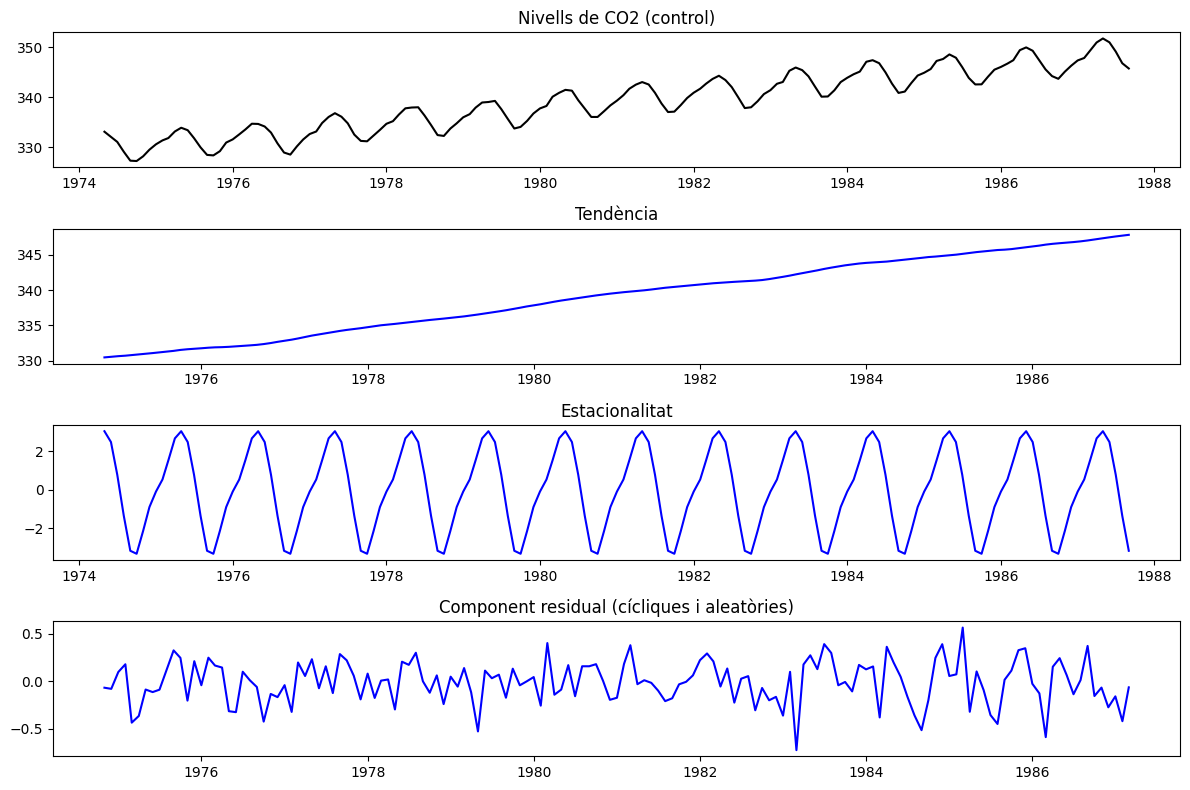

In [14]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
# Creem una nova columna al dataframe per a controlar linearment la variable de temps

df.set_index('Date', inplace=True)

# Fem servir la llibreria Statsmodels
decomposition = sm.tsa.seasonal_decompose(df['CO2'], model='additive', period=12)

trend = decomposition.trend # Tendència
seasonal = decomposition.seasonal # Estacionalitat
residual = decomposition.resid # Cícliques + aleatòries

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['CO2'], color='black')
plt.title('Nivells de CO2 (control)')

plt.subplot(412)
plt.plot(trend, color='blue')
plt.title('Tendència')

plt.subplot(413)
plt.plot(seasonal, color='blue')
plt.title('Estacionalitat')

plt.subplot(414)
plt.plot(residual, color='blue')
plt.title('Component residual (cícliques i aleatòries)')

plt.tight_layout()
plt.show()

Tendència:
- Es pot observar que els nivells de CO2 tendeixen a incrementar anualment, tot i que a gràfic original s'observin valors de pujades i baixades constants. Veiem una línea gairebé recta que ens indica que, de mitjana, els nivells de CO2 al llarg de l'any incrementen amb la mateixa pendent cada any.

Estacionalitat:
- Aquest gràfic ens ajuda a veure la variació dels nivells de CO2 per cada període detectat en la descomposició. Observem que, en cada any, es produeixen dues pujades i baixades en el nivell de CO2 per cada any. Observem que aquestes variacions (per la naturalesa de la descomposició de l'estudi) són idèntiques per cada un dels períodes.

Component residual:
- Aquesta component inclou els últims termes de la fórmula de la descomposició de la sèrie temporal (ct + et), que inclou variacions cícliques i aleatòries. Arribem a la conclusió que es tracta d'una component de "soroll" que no indica cap tendència marcada significativa. Veiem que el rang resultant en aquest gràfic és d'aproximadament 1 ppm, que considerem insignificant per l'estudi (la variació de l'estacionalitat té un rang d'uns 5 ppm).

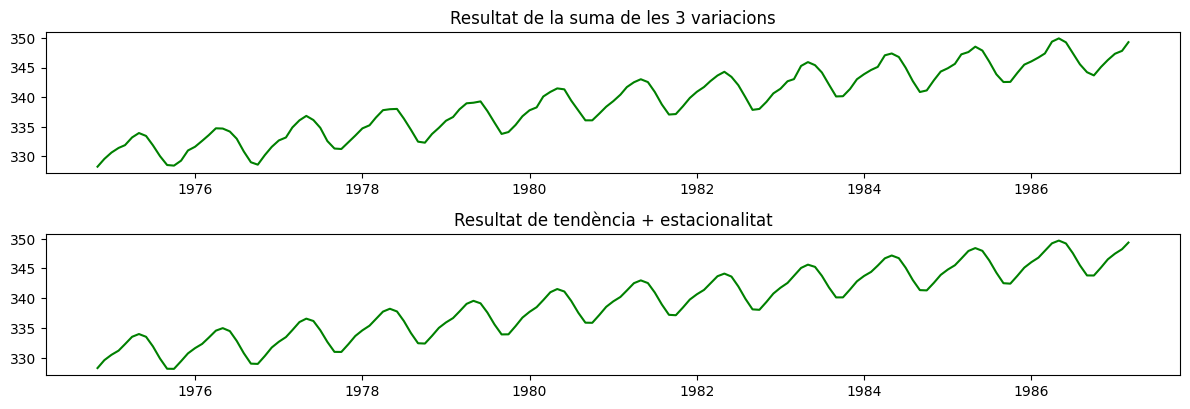

In [15]:
total = trend + seasonal + residual
noresidual = trend + seasonal

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(total, color='green')
plt.title('Resultat de la suma de les 3 variacions')

plt.subplot(412)
plt.plot(noresidual, color='green')
plt.title('Resultat de tendència + estacionalitat')

plt.tight_layout()
plt.show()

Aquí comprovem si les variacions residuals tenen realment una importància significativa, comparant la suma de les 3 variacions (que resulta en el gràfic original), amb la suma de la tendència amb l'estacionalitat. Observem com són gairebé idèntiques, i amb la fórmula $x_t = f_t + s_t$ podríem fer una aproximació relativament bona.

## Exercici 3: Estacionarietat de la sèrie temporal (_2 punts_)

Una sèrie temporal és **estacionària** si les propietats de la sèrie temporal (per exemple, mitjana, variància, autocorrelació, etc.) no canvien amb el temps.

En aquest exercici, cal:
1. Aplica el test de **Dickey-Fuller Aumentat** (_Augmented Dickey-Fuller_, ADF).
2. A partir dels resultats obtinguts, justifica si la sèrie temporal és estacionària.

In [16]:
adftest = sm.tsa.stattools.adfuller(df['CO2'])

print("Resultats del Test ADF")
print("Hipòtesi nul·la: La sèrie té una arrel unitària (no estacionària)")
print("Estadístic ADF:", adftest[0])
print("P-valor:", adftest[1])
print("Nombre de retards:", adftest[2])
print("Nombre d'observacions:", adftest[3])
print("Valors crítics:", adftest[4])
print("Nota: Si el P-valor és menor que 0.05, rebutgem la hipòtesi nul·la i la sèrie és estacionària")

Resultats del Test ADF
Hipòtesi nul·la: La sèrie té una arrel unitària (no estacionària)
Estadístic ADF: -0.35566811728740305
P-valor: 0.9172416481644101
Nombre de retards: 14
Nombre d'observacions: 146
Valors crítics: {'1%': -3.4759527332353084, '5%': -2.881548071241103, '10%': -2.577438765246763}
Nota: Si el P-valor és menor que 0.05, rebutgem la hipòtesi nul·la i la sèrie és estacionària


Basant-nos en el P-valor (0.9172416481644101), major que 0.05, no hi ha prou evidència per rebutjar la hipòtesi nul·la (que es tracti d'una sèrie no estacionaria). Per tant, es conclou que **la sèrie no és estacionària**.

## Exercici 4: Comentaris finals (_1 punt_)

Finalment, respon a les següents preguntes **justificant la teva resposta** i **relacionant-la amb els resultats** que has obtingut en aquesta activitat:
1. Detalla les característiques principals de la sèrie temporal, identificant-ne l'estacionarietat, tendència, etc.
2. Quines conclusions extreus de l'anàlisi realitzat?

- **Tendència**: La sèrie mostra un increment anual dels nivells de CO2, amb una tendència gairebé lineal.
- **Estacionalitat**: Hi ha variacions estacionals amb dues pujades i baixades per any, que són consistents en cada període.
- **Variacions Cícliques i Aleatòries**: La component residual és d’aproximadament 1 ppm, considerada insignificant per a l’estudi1.
- **Estacionarietat**: El test de Dickey-Fuller Aumentat indica que la sèrie no és estacionària, ja que el P-valor és major que 0.05.

Les dades suggereixen que, tot i que hi ha una tendència clara i estacionalitat en els nivells de CO2, **la sèrie temporal no és estacionària**, indicant que les propietats estadístiques com la mitjana i la variància canvien amb el temps.